## California Housing DataSet

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Fetch the Dataset from sklearn

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Split the data to train and test and standardize it

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [8]:
print(f'len(X_train_full): {len(X_train_full)}')
print(f'len(X_train): {len(X_train)}')
print(f'len(X_valid): {len(X_valid)}')
print(f'len(X_test): {len(X_test)}')
print(f'len(y_train_full): {len(y_train_full)}')
print(f'len(y_train): {len(y_train)}')
print(f'len(y_valid): {len(y_valid)}')
print(f'len(y_test): {len(y_test)}')

len(X_train_full): 15480
len(X_train): 11610
len(X_valid): 3870
len(X_test): 5160
len(y_train_full): 15480
len(y_train): 11610
len(y_valid): 3870
len(y_test): 5160


### Convert X_train into dataframe and print

In [9]:
df_train = pd.DataFrame(X_train_full, columns=housing.feature_names)

print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.2143      37.0  5.288235   0.973529       860.0  2.529412     33.81   
1  5.3468      42.0  6.364322   1.087940       957.0  2.404523     37.16   
2  3.9191      36.0  6.110063   1.059748       711.0  2.235849     38.45   
3  6.3703      32.0  6.000000   0.990196      1159.0  2.272549     34.16   
4  2.3684      17.0  4.795858   1.035503       706.0  2.088757     38.57   

   Longitude  
0    -118.12  
1    -121.98  
2    -122.69  
3    -118.41  
4    -121.33  


### Lets standardize the data

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
print(f'X_train: {X_train.shape}')
print(f'X_valid: {X_valid.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_valid: {y_valid.shape}')
print(f'y_test: {y_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (11610, 8)
X_valid: (3870, 8)
X_test: (5160, 8)
y_train: (11610, 1)
y_valid: (3870, 1)
y_test: (5160, 1)
y_test: (5160, 1)


### Seed for fixed randomness in numpy

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

### Neural Network Architecture

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), # In this 30 is the number of neurons in the hidden layer and input_shape is the number of features in the training data (input (8))
    keras.layers.Dense(10, activation="relu"), # In this 10 is the number of neurons in the hidden layer
    keras.layers.Dense(1) # In this 1 is the number of neurons in the output layer
])

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 2.2113 - val_loss: 0.9368
Epoch 2/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.6491 - val_loss: 0.5951
Epoch 3/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.5777 - val_loss: 0.5601
Epoch 4/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.5396 - val_loss: 0.5174
Epoch 5/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.5098 - val_loss: 0.4831
Epoch 6/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.4868 - val_loss: 0.4586
Epoch 7/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.4690 - val_loss: 0.4428
Epoch 8/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.4549 - val_loss: 0.4333
Epoch 9/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.4437 - val_loss: 0.4278
Epoch 10/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.4346 - val_loss: 0.4246
Epoch 11/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.4272 - val_loss: 0.4229
Epoch 12/60
363/363 ━━━━━━━━━━

In [24]:
print(model.summary())

print(history.history)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593 (2.32 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
{'loss': [2.2113053798675537, 0.6490612626075745, 0.5776634812355042, 0.5396436452865601, 0.5098035335540771, 0.48683300614356995, 0.4689939022064209, 0.45494621992111206, 0.44367820024490356, 0.4346469044685364, 0.42715978622436523, 0.42097461223602295, 0.41584575176239014, 0.411564439535141, 0.40782594680786133, 0.40440240502357483, 0.40127184987068176, 0.3984508812427521, 0.39589259028434753, 0.39358973503112793, 0.39150574803352356, 0.3896116018295288, 0.38785243034362793, 0.3862115144729614, 0.38466906547546387, 0.3832530975341797, 0.381939172744751, 0.38071733713150024, 0.3795988857746124, 0.37855294346809387, 0.37758103013038635, 0.37666264176368713, 0.3757731020450592, 0.3749189078807831, 0.3741149604320526, 0.37333548069000244, 0.3725988566875458, 0.37188807129859924, 0.3711991310119629, 0.3705179989337921, 0.3698466420173645, 0.3692050576210022, 0.3685891330242157, 0.3679894804954529, 0.36738717555999756, 0.3667837679386139, 0.366158664226532, 0.36557239294052124, 0.3649

### Plot the loss

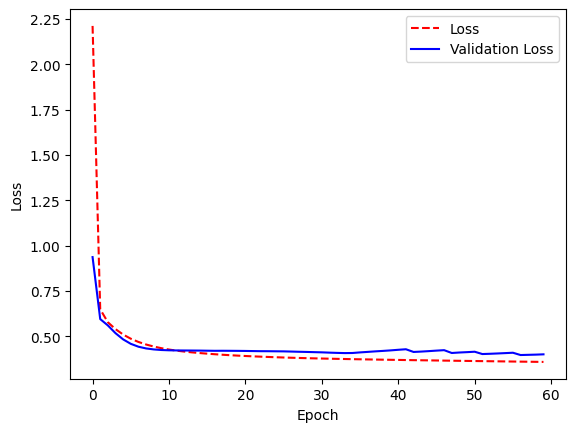

In [25]:
plt.plot(history.history["loss"], "r--", label="Loss")
plt.plot(history.history["val_loss"], "b-", label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Evaluate the test data

In [26]:
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.3558


In [28]:
# Make new predictions on test data

X_new = X_test[:3]
y_pred = model.predict(X_new)

for i in range(len(X_new)):
    print(f"Sample {i+1}: Predicted = {y_pred[i][0]:.0f}, Actual = {y_test[i][0]:.0f}")

print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Sample 1: Predicted = 1, Actual = 0
Sample 2: Predicted = 2, Actual = 0
Sample 3: Predicted = 4, Actual = 5
[[0.87331164]
 [1.89957   ]
 [4.0825257 ]]
